In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from datetime import timedelta
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Average Values

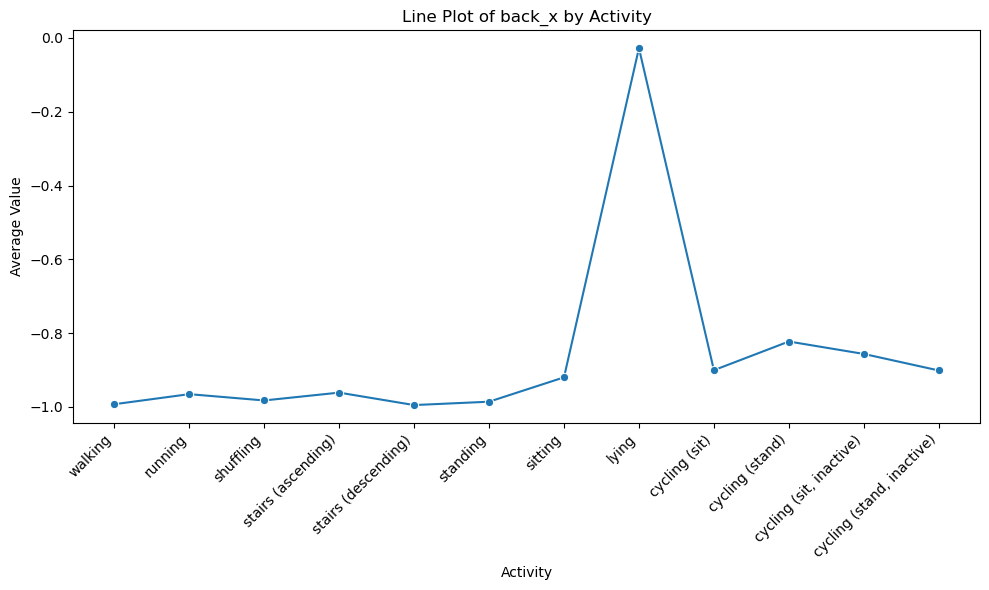

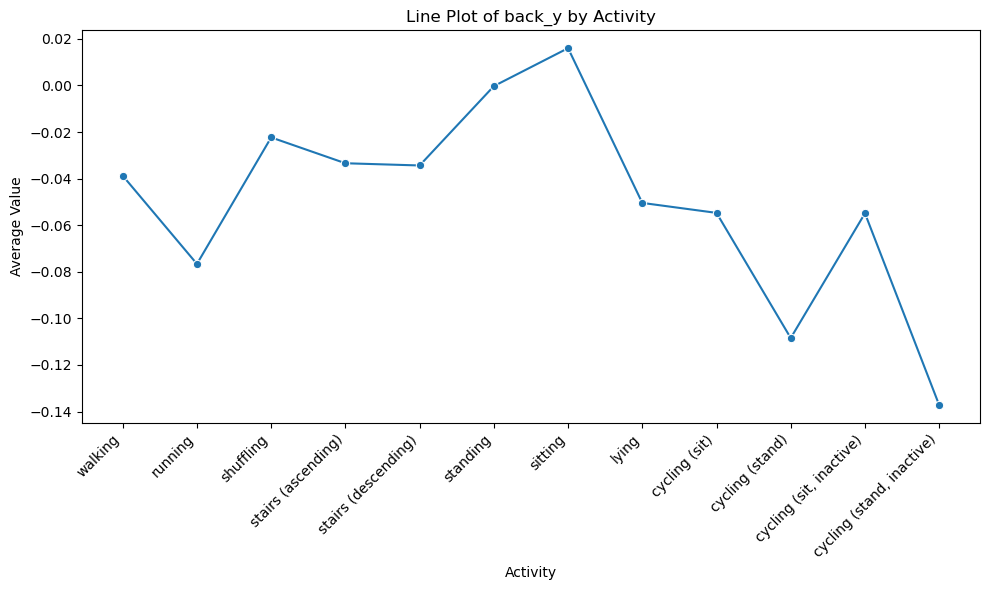

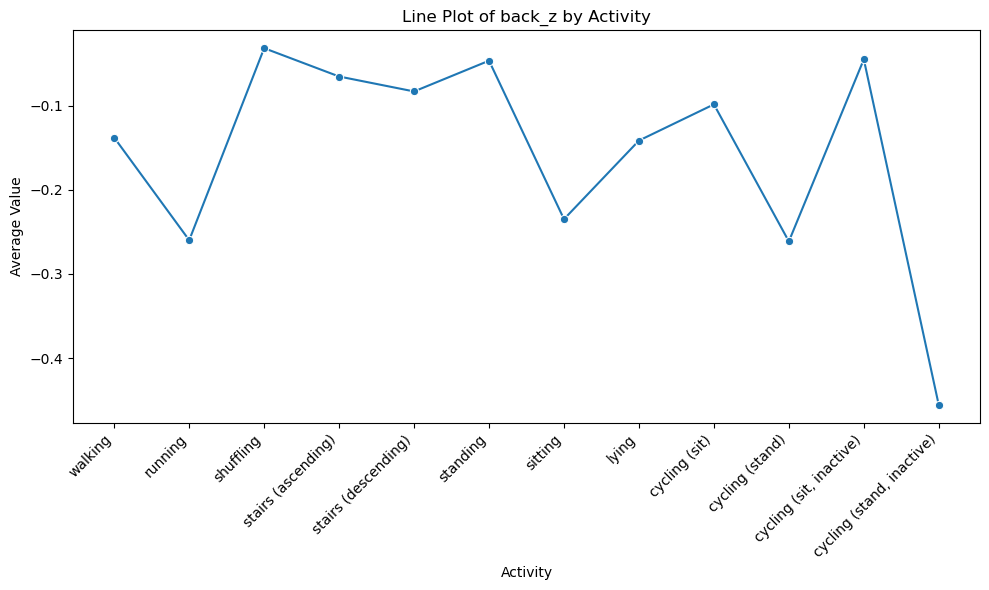

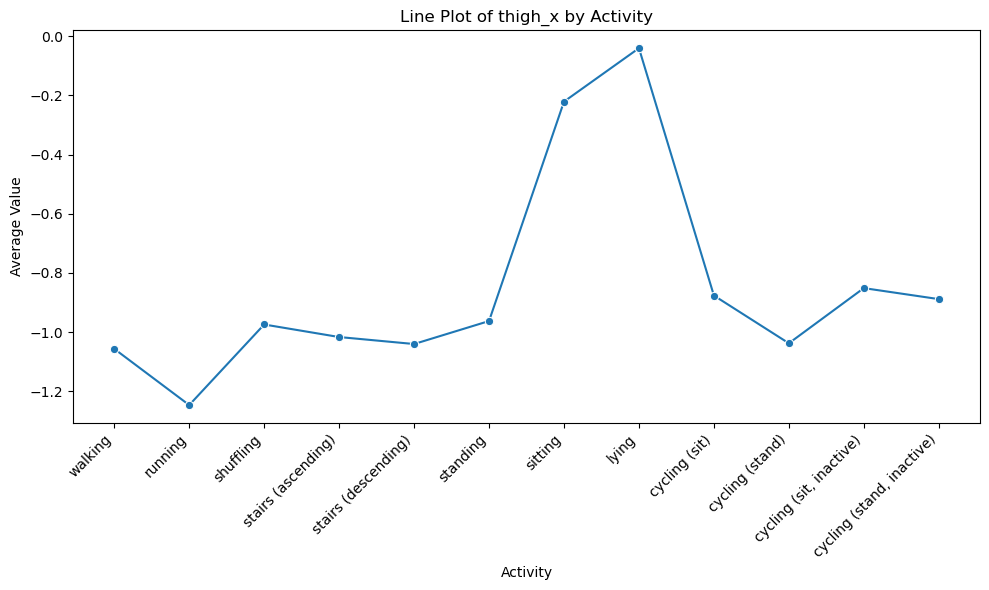

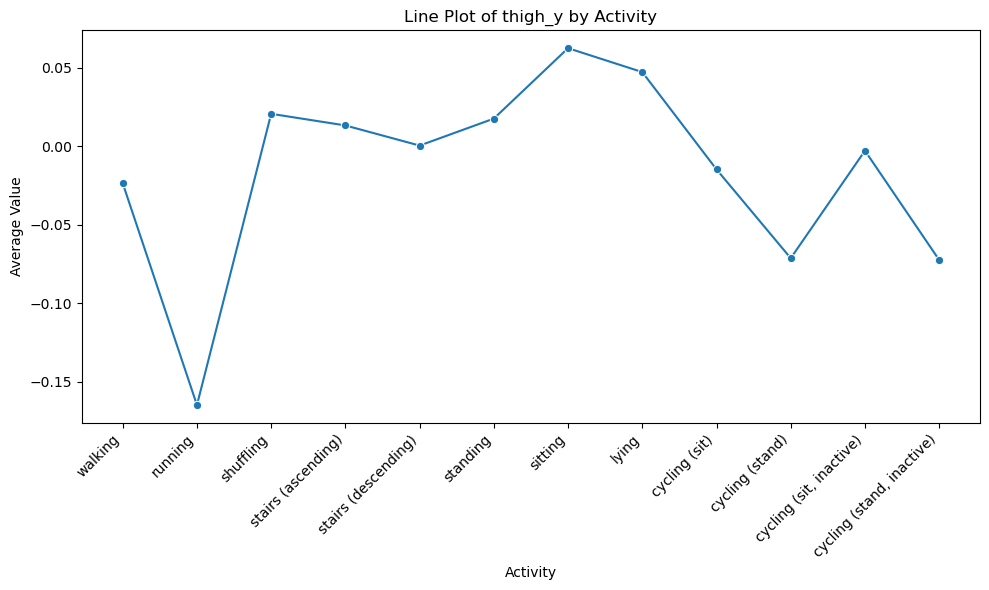

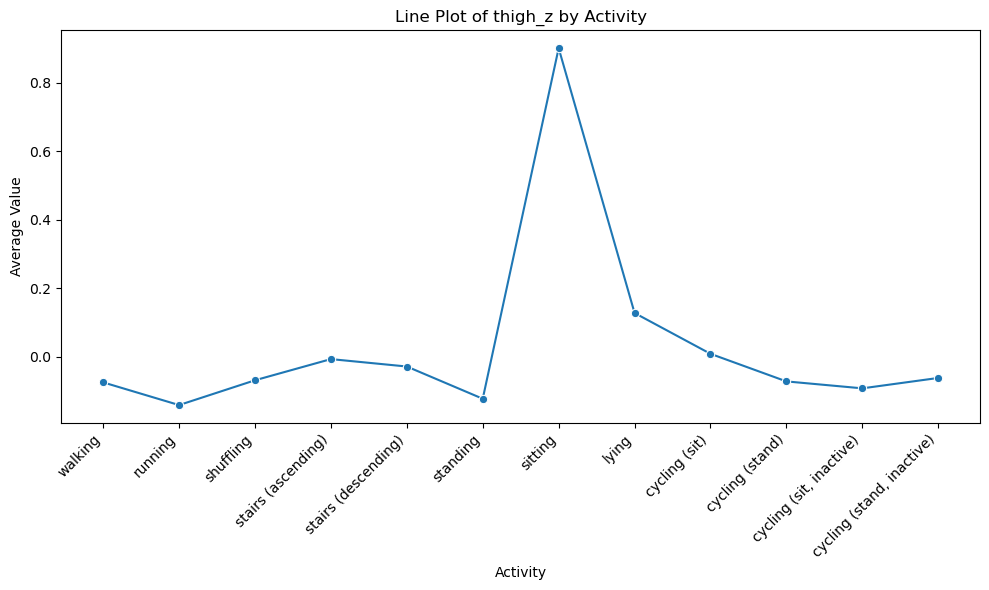

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# Get a list of all CSV files in a directory
csv_files = glob.glob('harth2/*.csv')

# Define the labels dictionary
labels = {1: "walking", 2: "running", 3: "shuffling", 4: "stairs (ascending)",
          5: "stairs (descending)", 6: "standing", 7: "sitting", 8: "lying",
          13: "cycling (sit)", 14: "cycling (stand)", 130: "cycling (sit, inactive)", 140: "cycling (stand, inactive)"}

# Read all CSV files into a single DataFrame
dfs = []
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)
combined_df = pd.concat(dfs)

# Calculate the average values of the specified columns
columns_of_interest = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']
averages = combined_df.groupby('label')[columns_of_interest].mean()

# Map label codes to their corresponding labels
averages['label'] = averages.index.map(labels)

# Plotting individual scatter plots with lines between points
for col in columns_of_interest:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='label', y=col, data=averages, marker='o', sort=False)  # Add marker and sort=False to maintain original order
    plt.xlabel('Activity')
    plt.ylabel('Average Value')
    plt.title(f'Line Plot of {col} by Activity')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


# Median

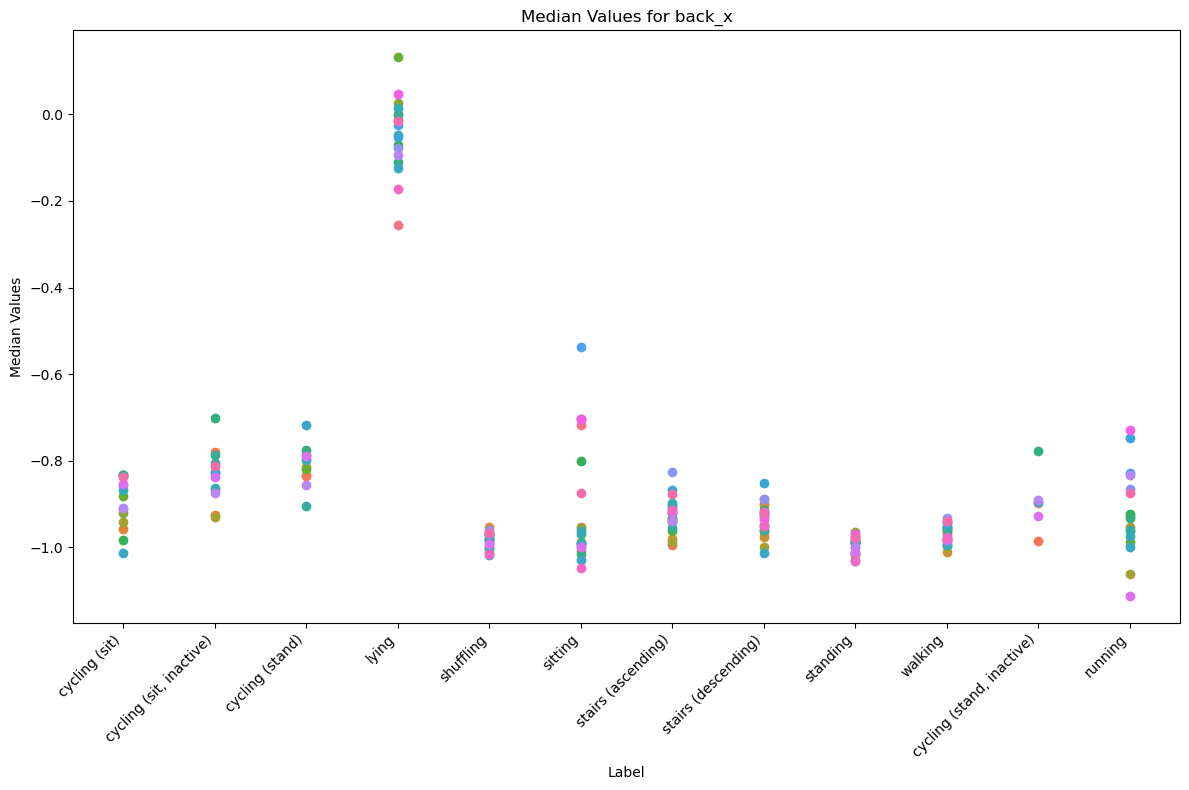

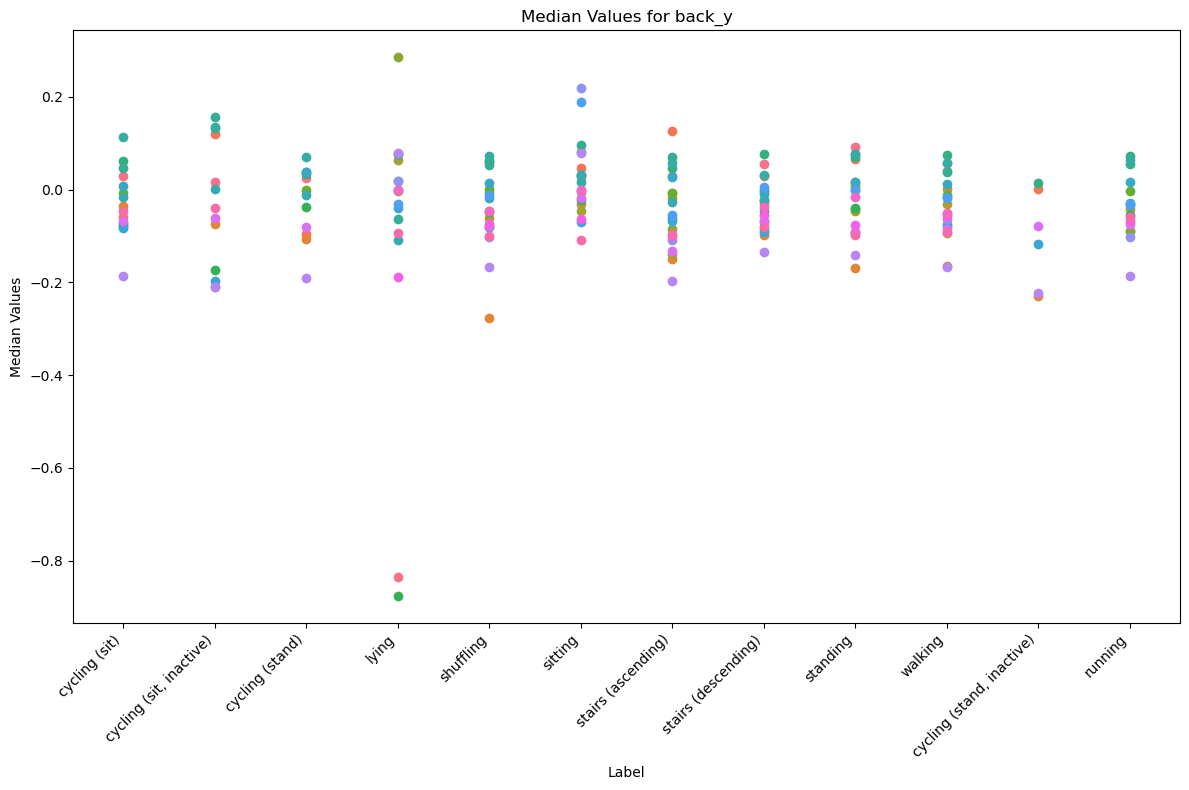

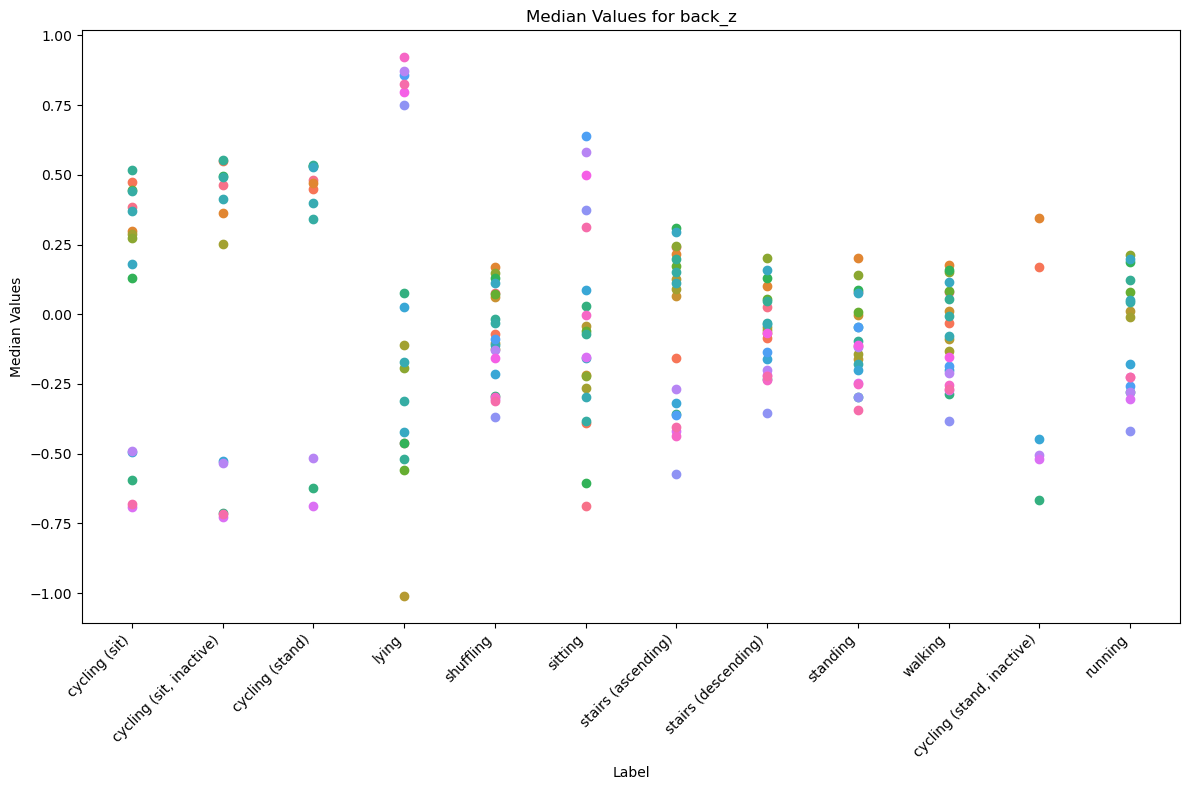

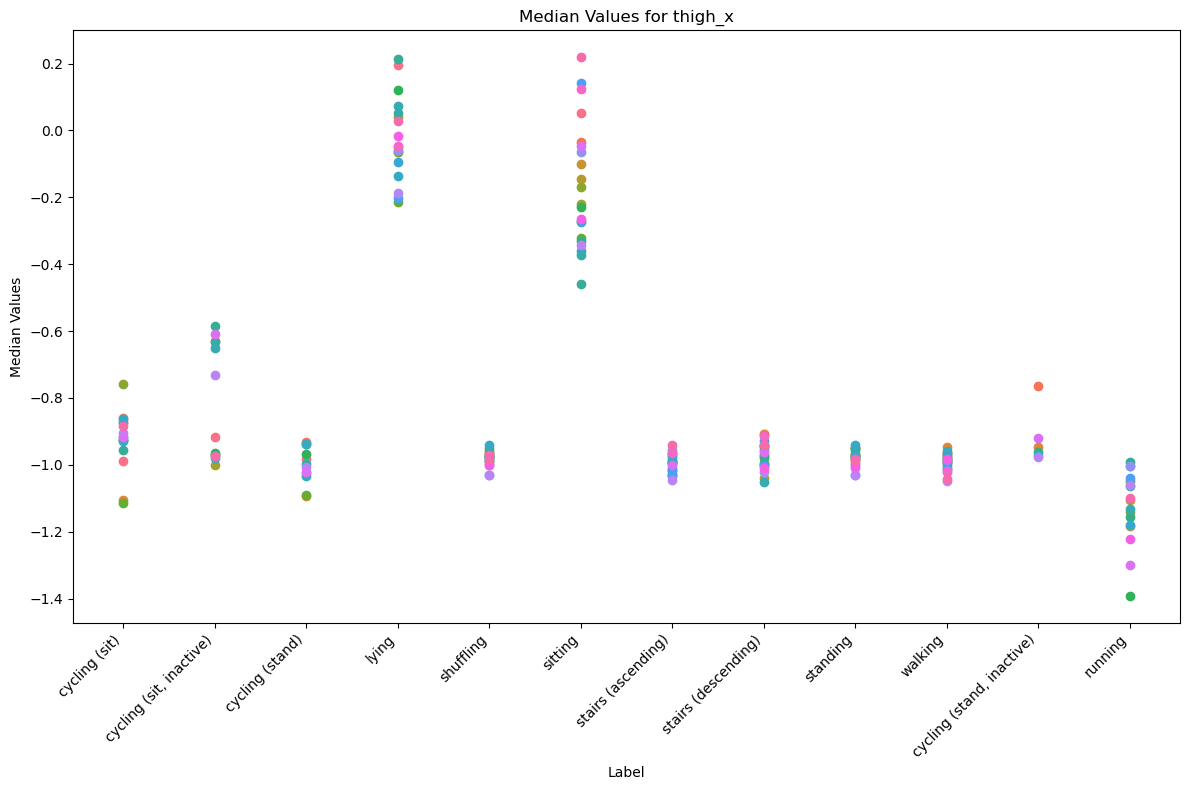

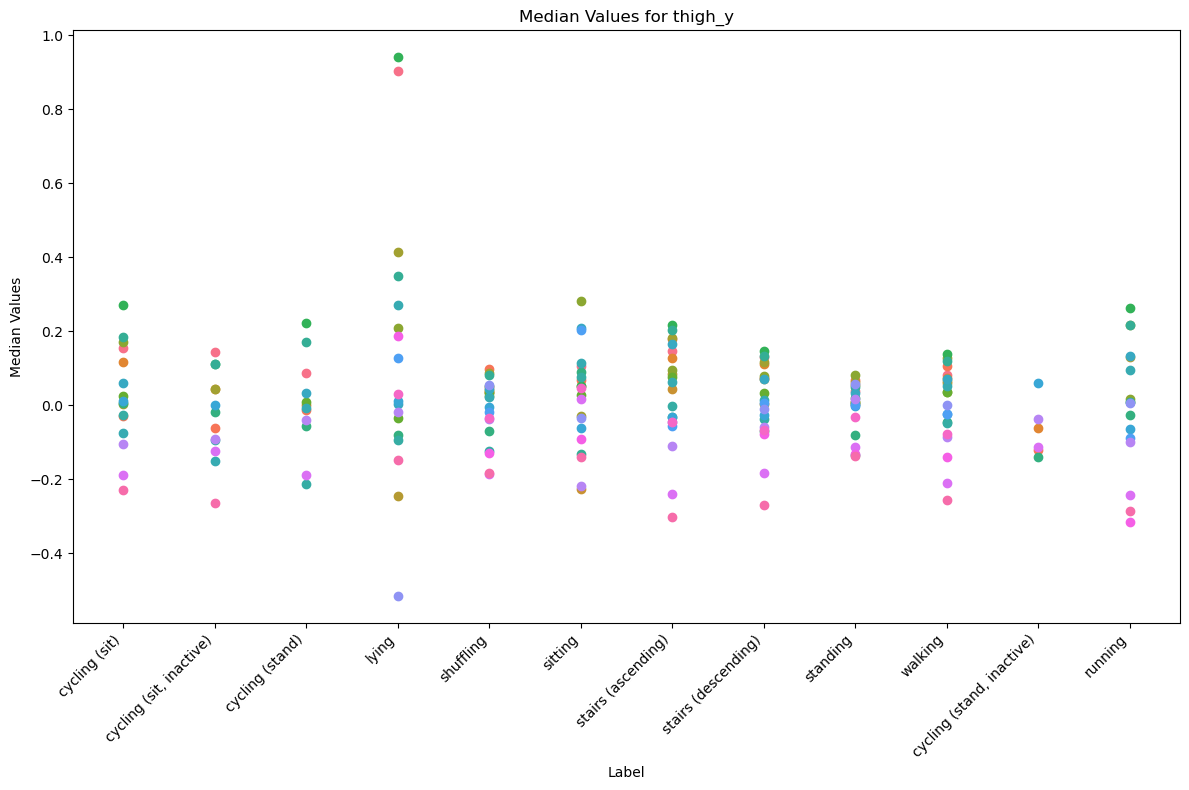

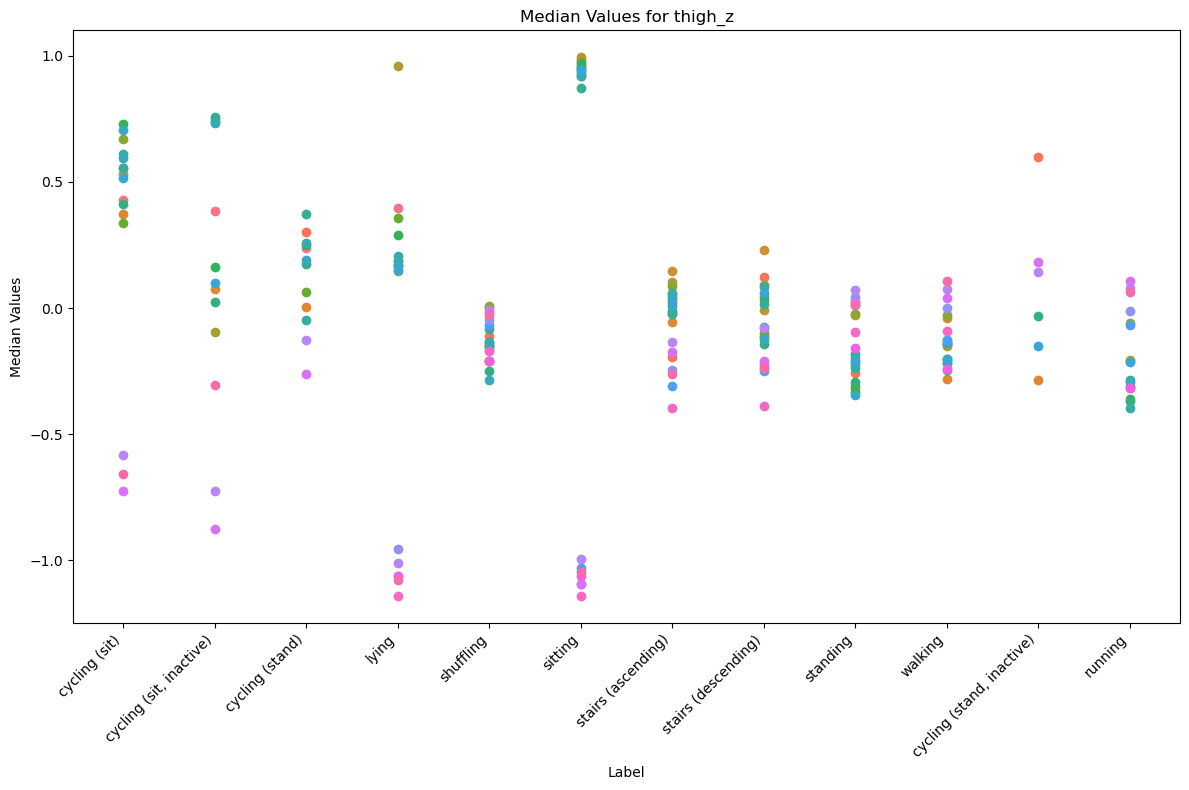

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns  # Import seaborn for color palettes

# Get a list of all CSV files in a directory
csv_files = glob.glob('harth2/*.csv')
# Define the labels dictionary
labels = {1: "walking", 2: "running", 3: "shuffling", 4: "stairs (ascending)",
          5: "stairs (descending)", 6: "standing", 7: "sitting", 8: "lying",
          13: "cycling (sit)", 14: "cycling (stand)", 130: "cycling (sit, inactive)", 140: "cycling (stand, inactive)"}
# Define a color palette with enough colors for the number of CSV files
colors = sns.color_palette('husl', len(csv_files))

# Iterate through each column
for column in ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']:
    plt.figure(figsize=(12, 8))

    # Iterate through each CSV file
    for idx, csv_file in enumerate(csv_files):
        # Read the CSV file
        df = pd.read_csv(csv_file)
        median_df = df.groupby('label')[column].median()
        median_df = median_df.reset_index()  # Resetting the index to access the 'label' column
        median_df['label'] = median_df['label'].map(labels)
        median_df = median_df.sort_values(by='label')  # Sorting by label

        # Plot median values for the current column and CSV file
        plt.scatter(median_df['label'], median_df[column], color=colors[idx])

    # Add title, labels, and legend
    plt.title(f"Median Values for {column}")
    plt.xlabel('Label')
    plt.ylabel('Median Values')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

# Mode

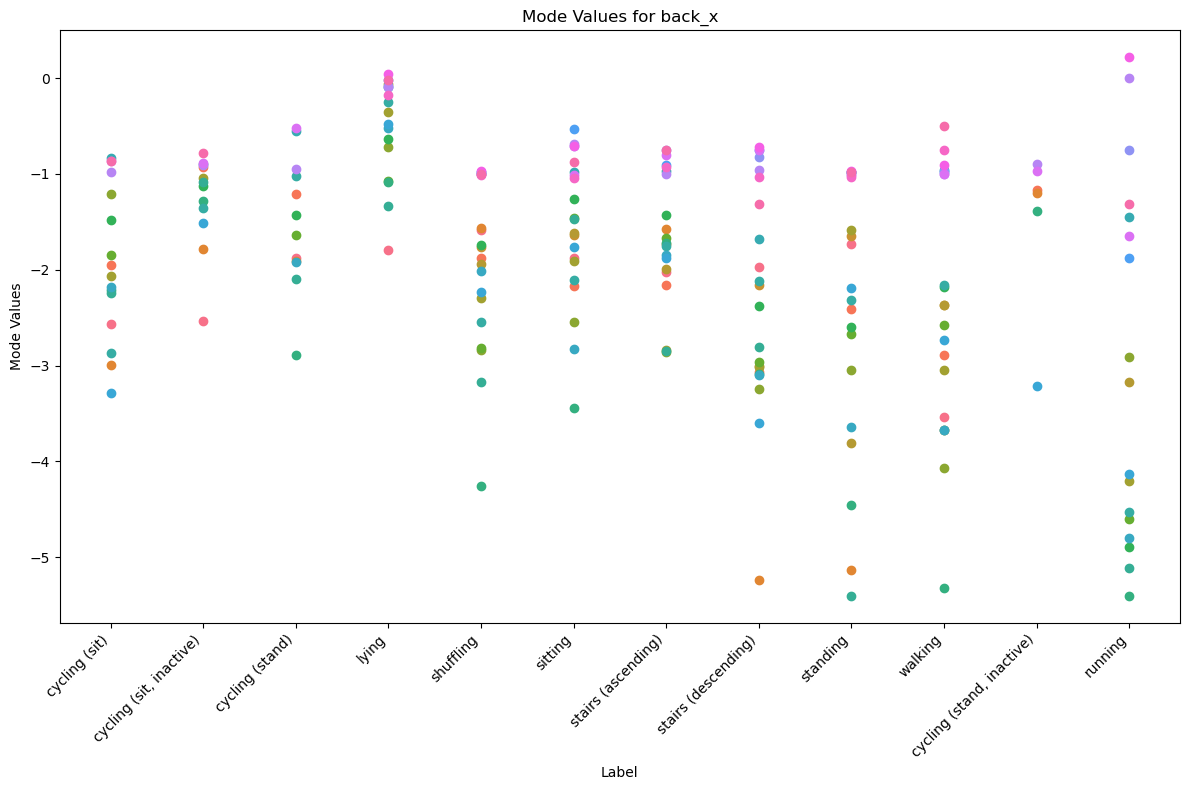

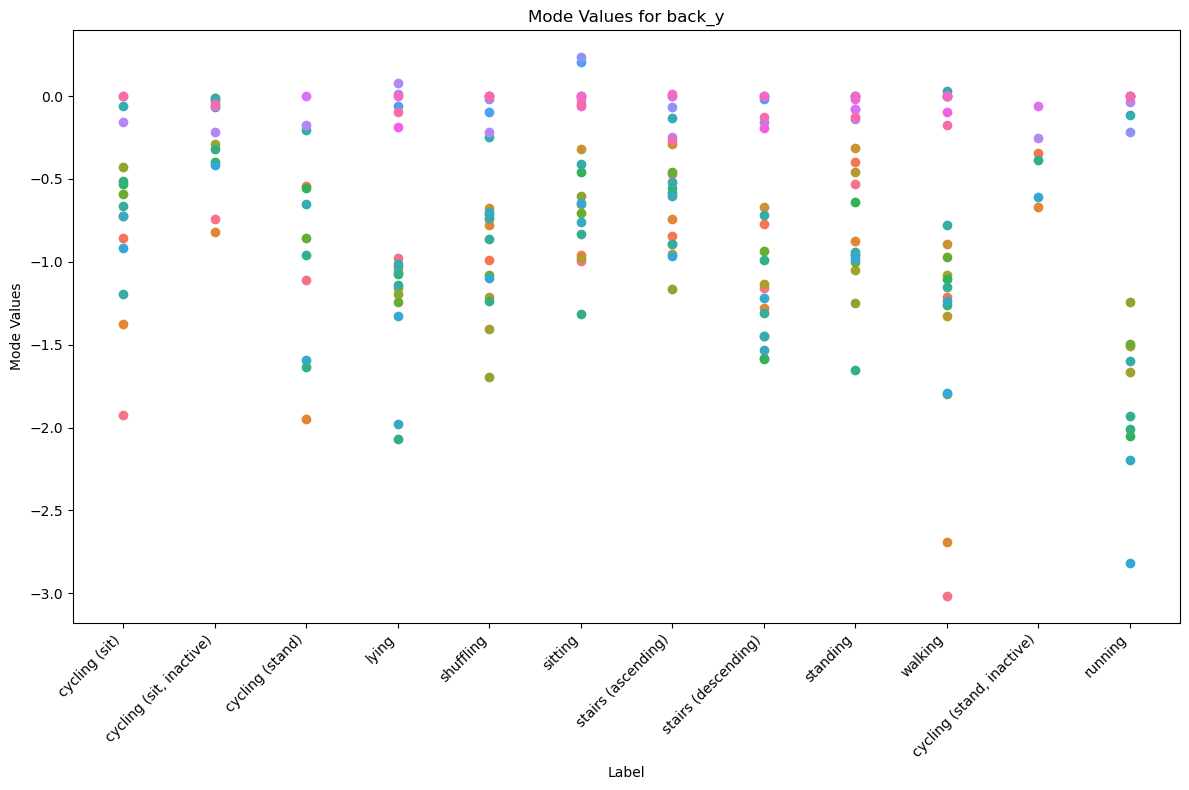

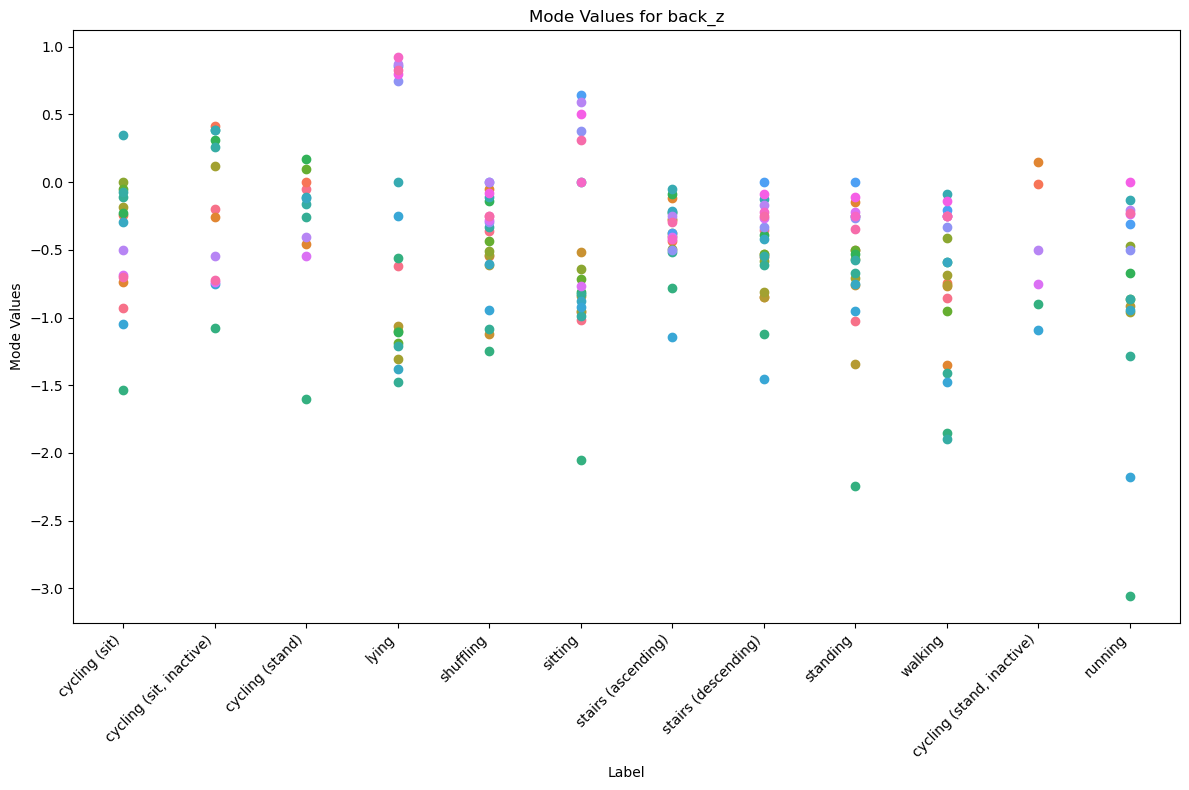

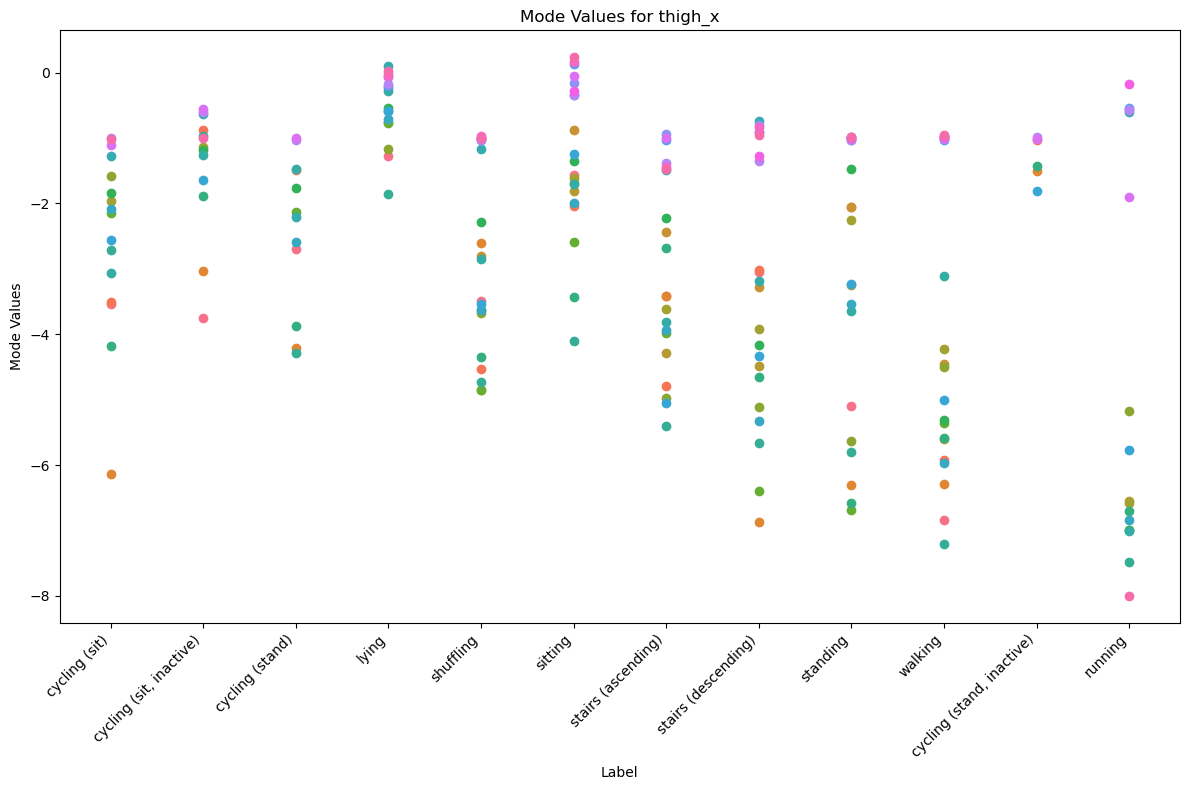

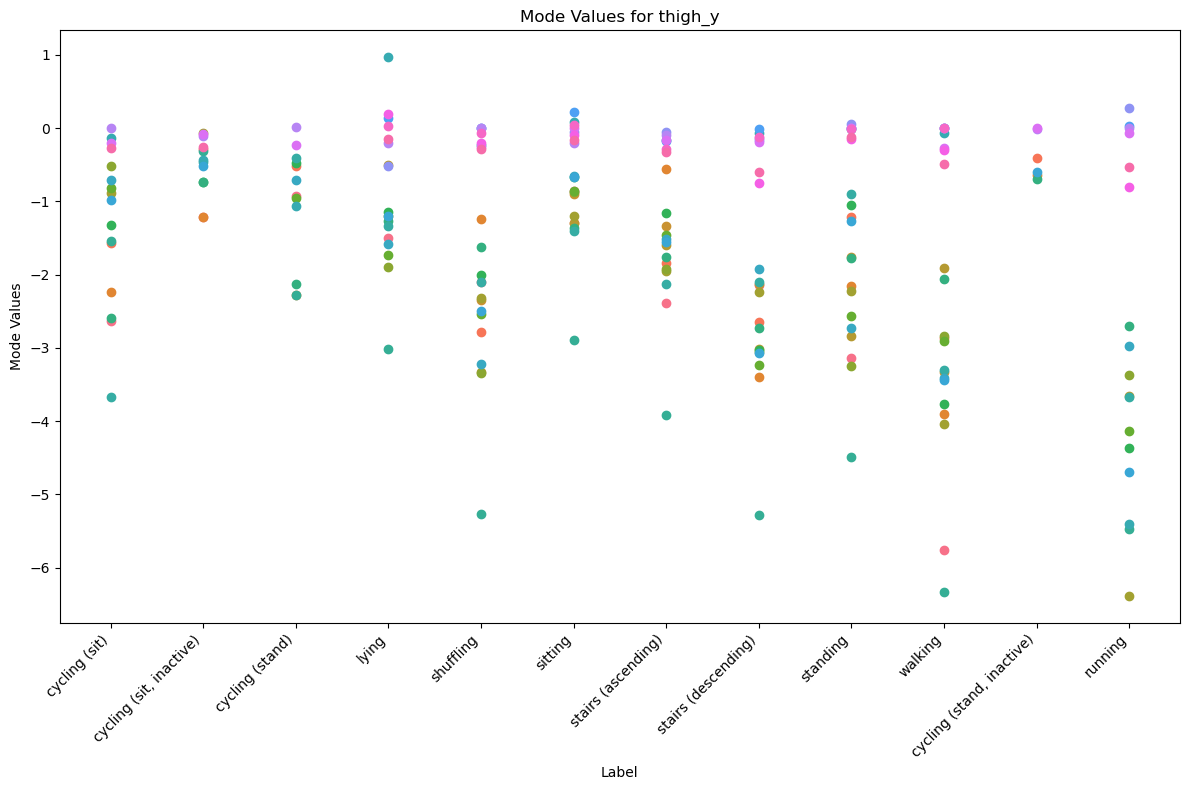

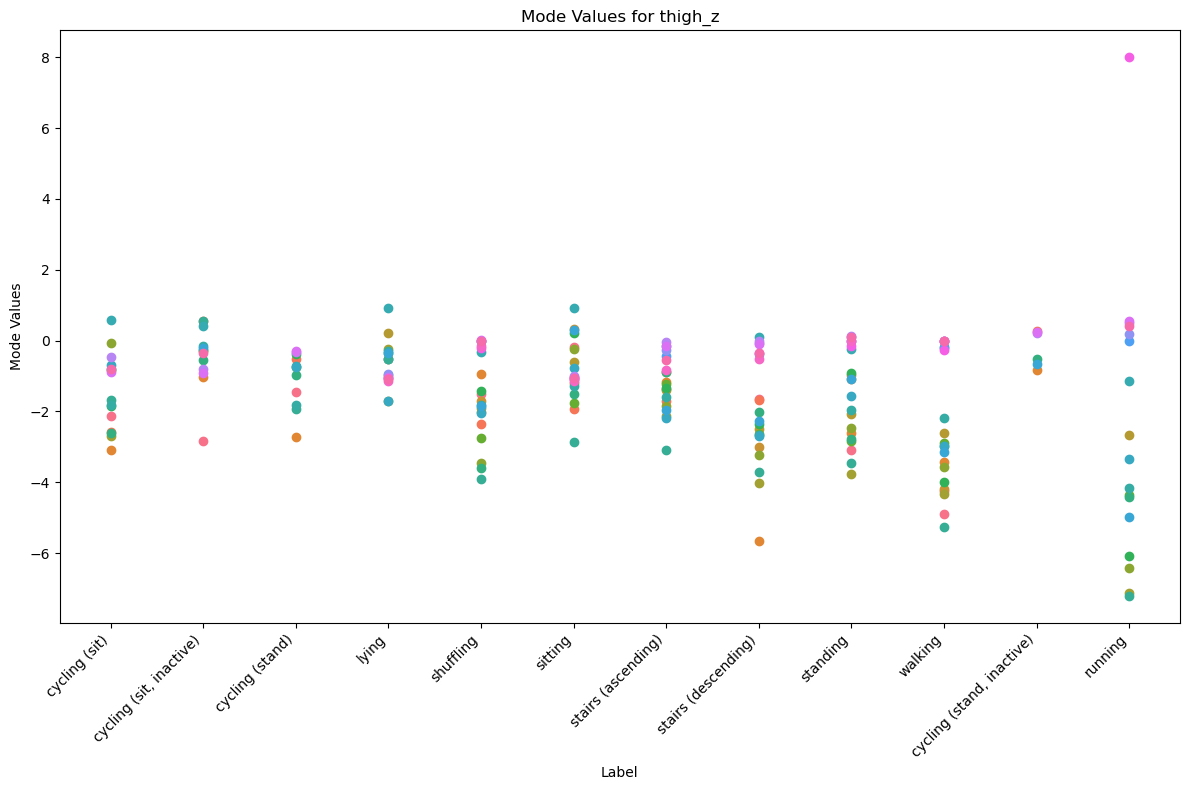

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns  # Import seaborn for color palettes

# Get a list of all CSV files in a directory
csv_files = glob.glob('harth2/*.csv')

# Define the labels dictionary
labels = {1: "walking", 2: "running", 3: "shuffling", 4: "stairs (ascending)",
          5: "stairs (descending)", 6: "standing", 7: "sitting", 8: "lying",
          13: "cycling (sit)", 14: "cycling (stand)", 130: "cycling (sit, inactive)", 140: "cycling (stand, inactive)"}

# Define a color palette with enough colors for the number of CSV files
colors = sns.color_palette('husl', len(csv_files))

# Iterate through each column
for column in ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']:
    plt.figure(figsize=(12, 8))

    # Iterate through each CSV file
    for idx, csv_file in enumerate(csv_files):
        # Read the CSV file
        df = pd.read_csv(csv_file)
        mode_df = df.groupby('label')[column].apply(lambda x: x.mode()[0])  # Calculate the mode instead of the mean
        mode_df = mode_df.reset_index()  # Resetting the index to access the 'label' column
        mode_df['label'] = mode_df['label'].map(labels)
        mode_df = mode_df.sort_values(by='label')  # Sorting by label

        # Plot mode values for the current column and CSV file
        plt.scatter(mode_df['label'], mode_df[column], color=colors[idx])

    # Add title, labels, and legend
    plt.title(f"Mode Values for {column}")
    plt.xlabel('Label')
    plt.ylabel('Mode Values')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()


# Range of Values

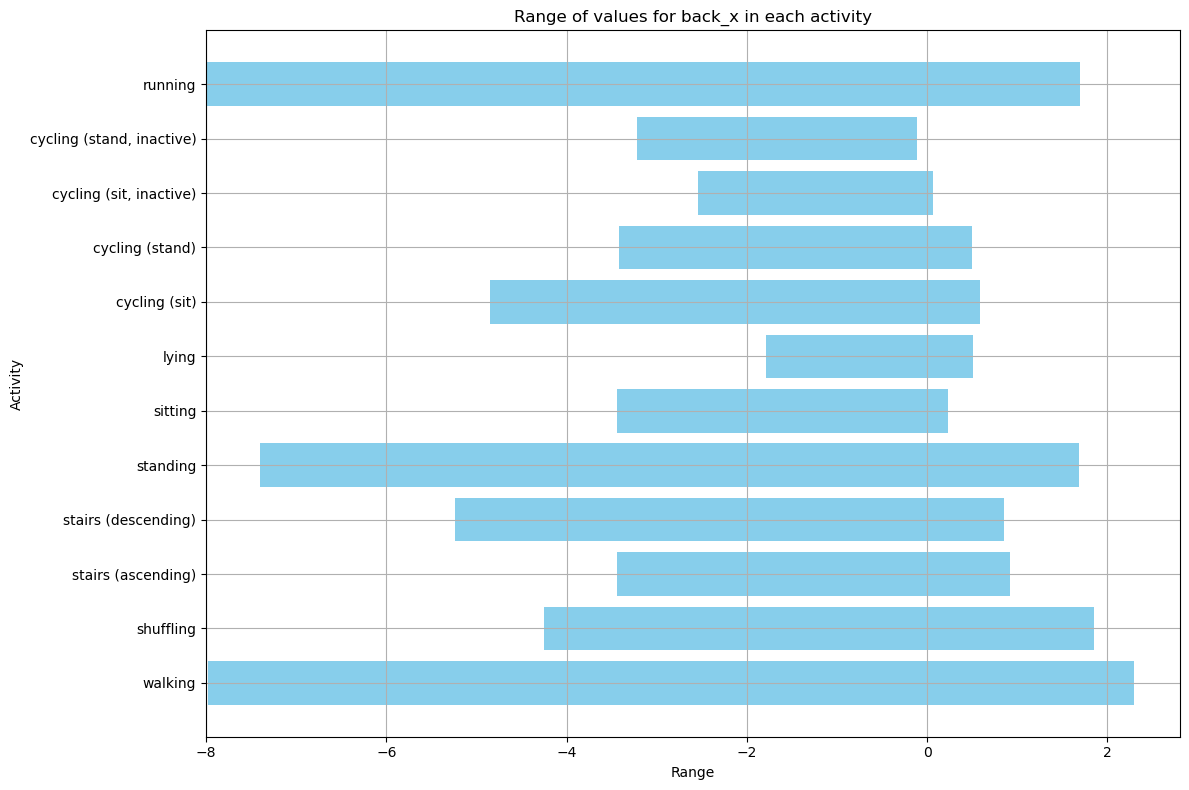

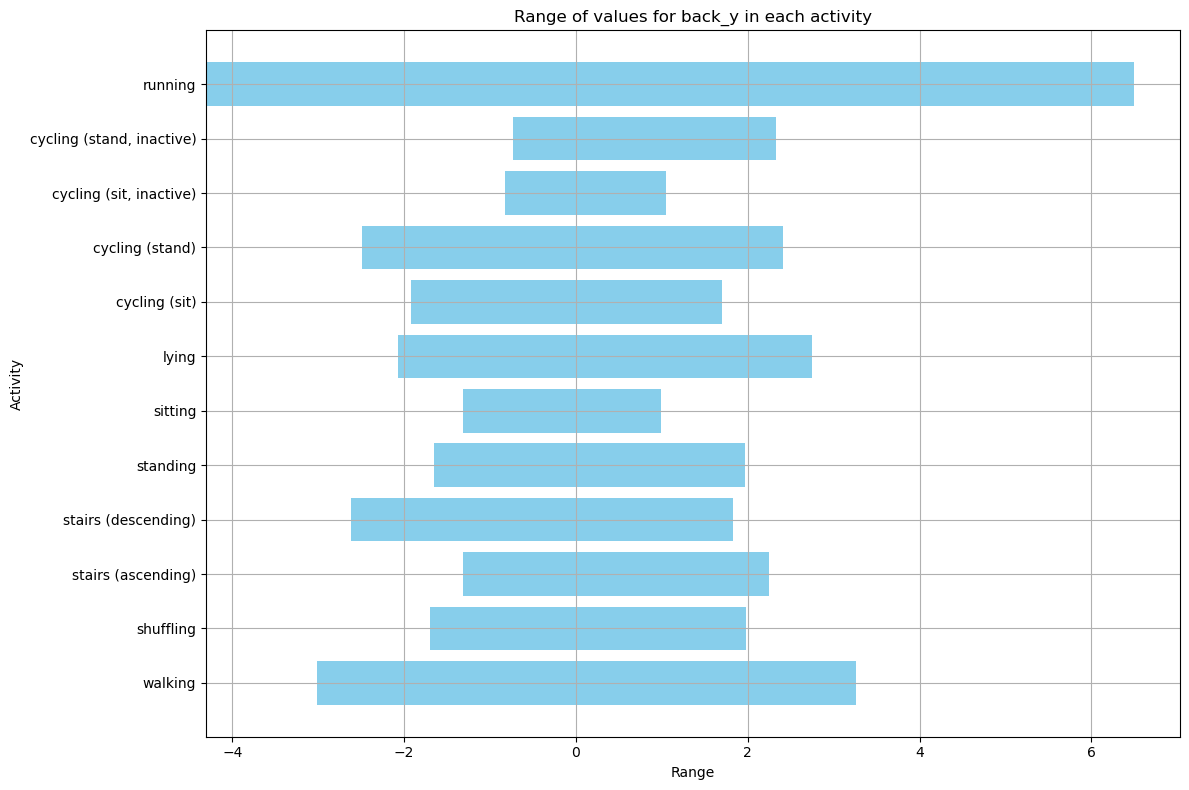

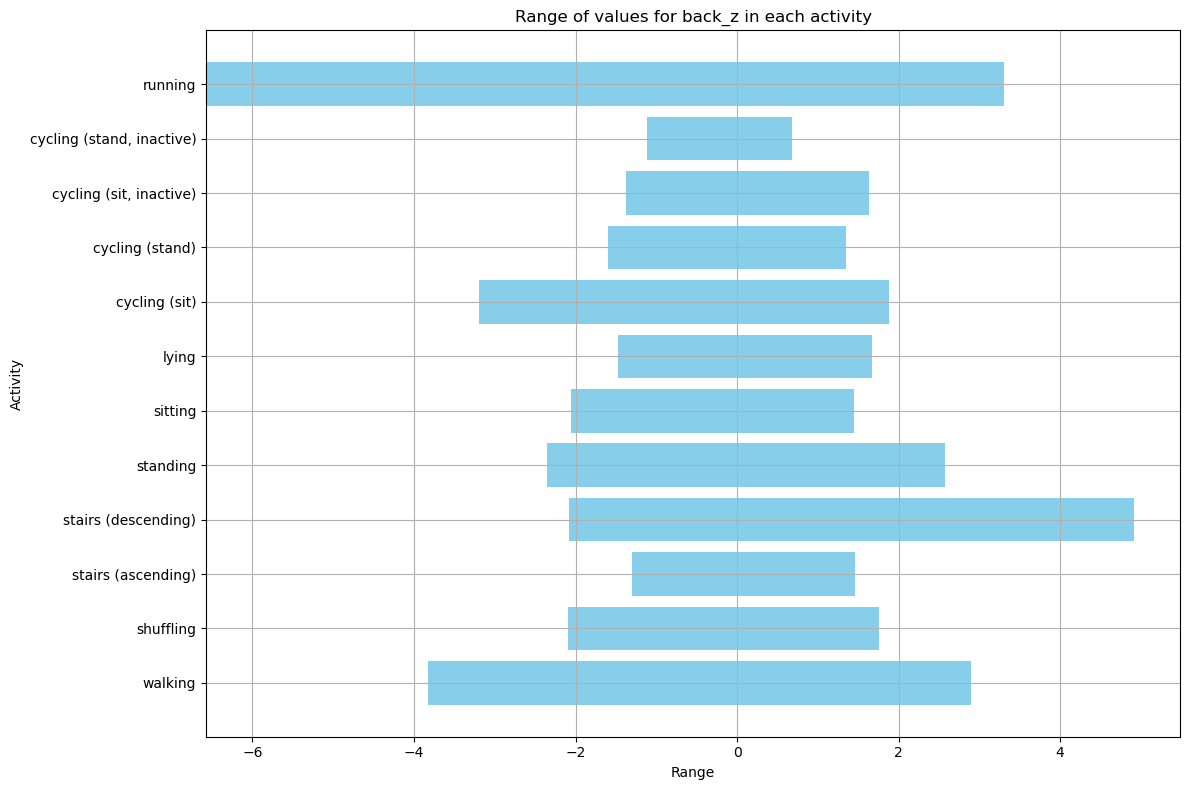

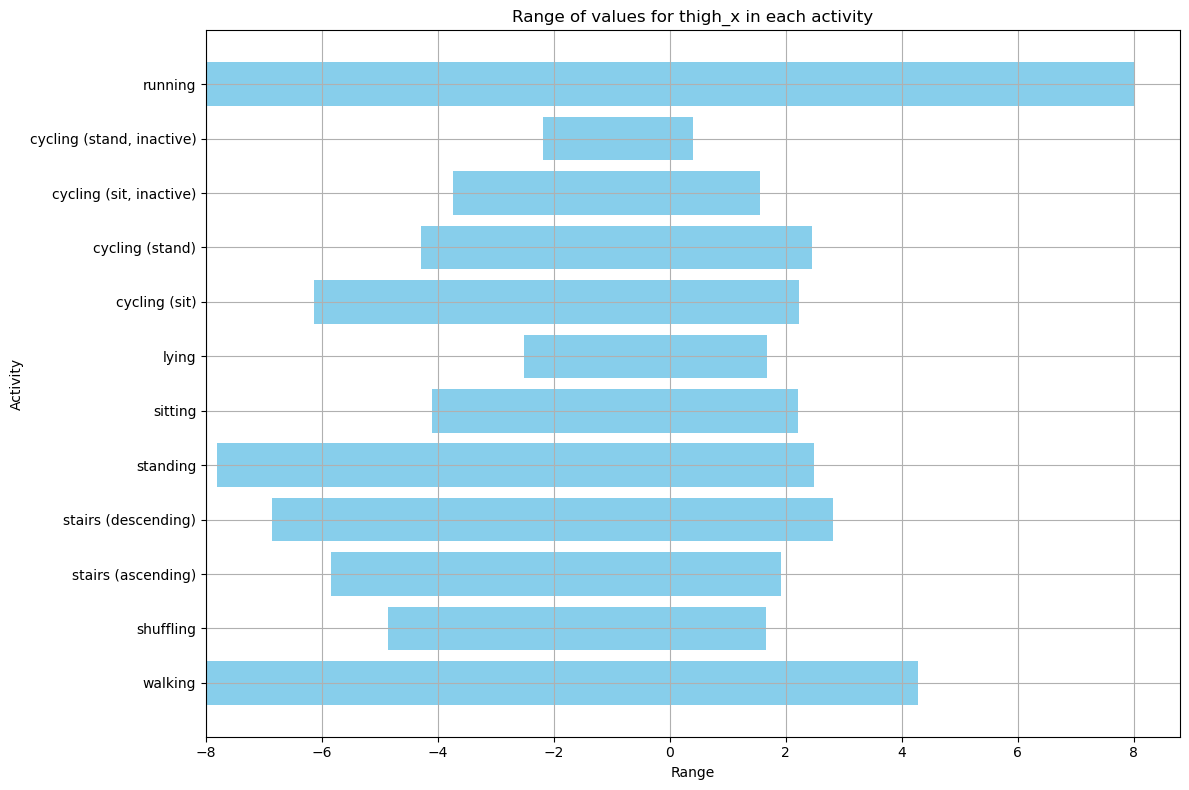

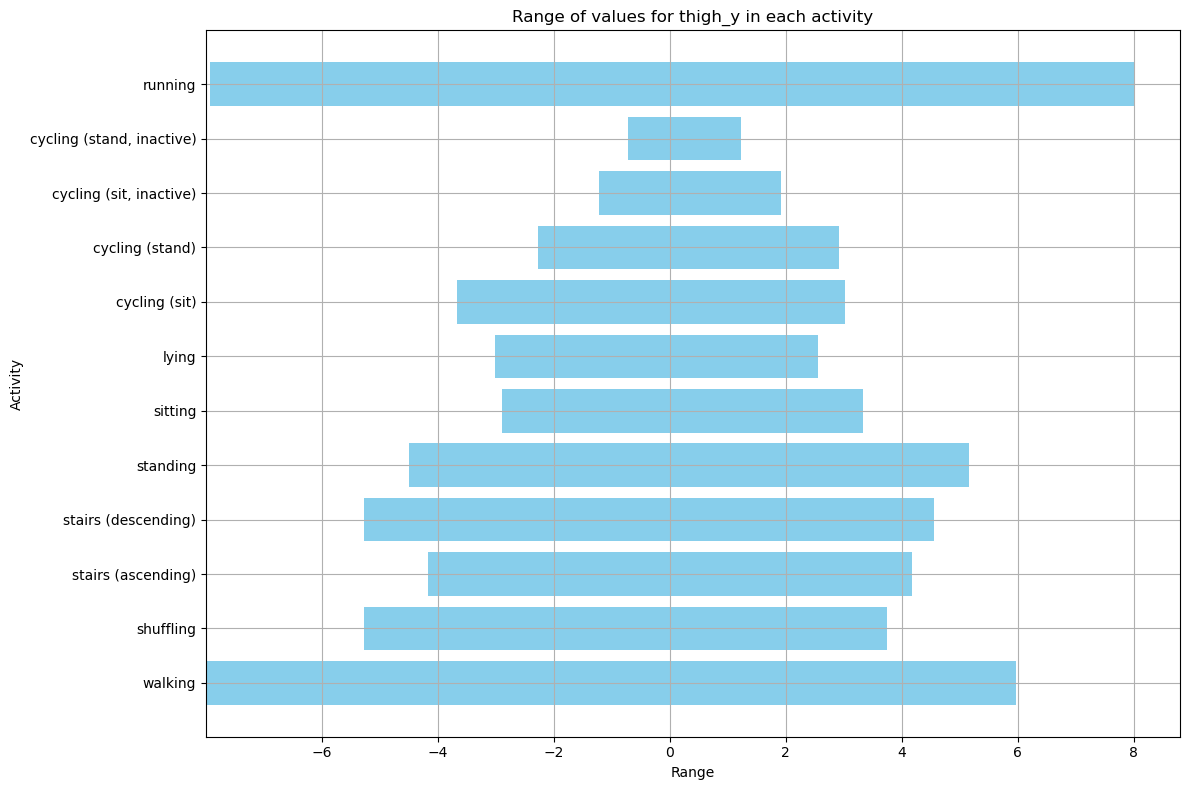

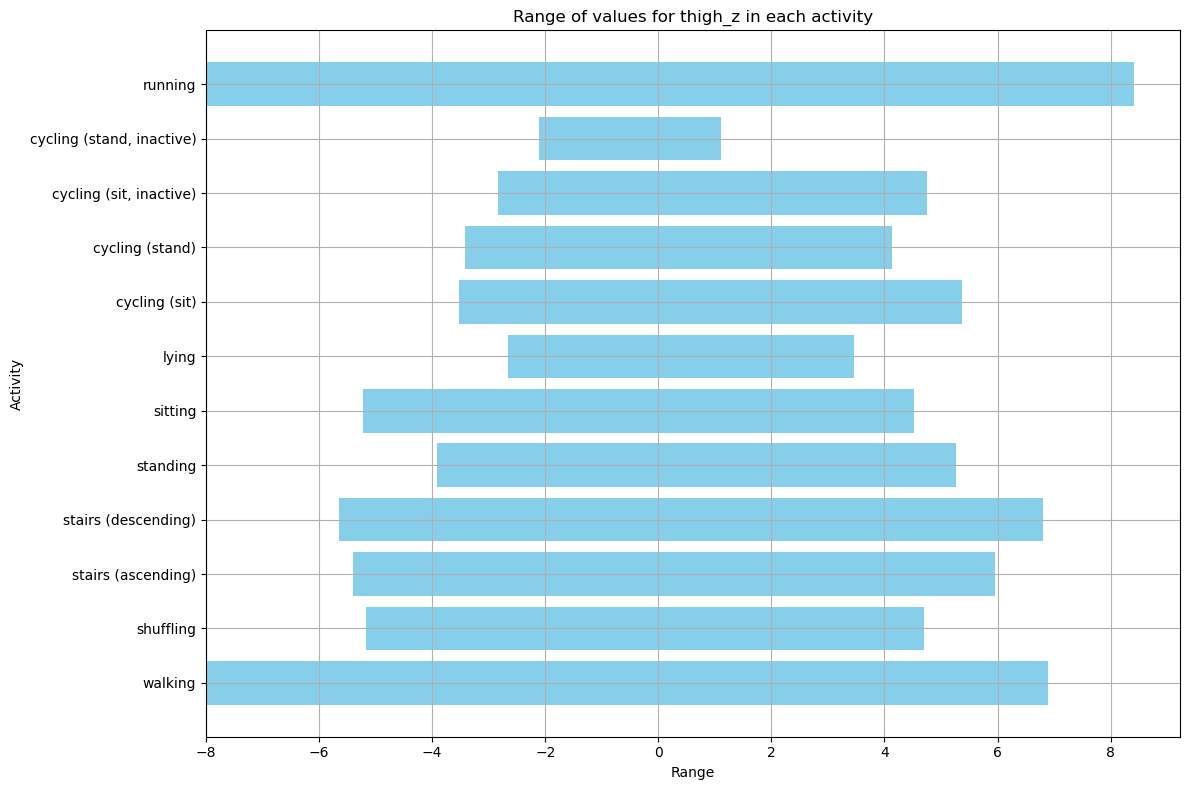

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

# Get a list of all CSV files in a directory
csv_files = glob.glob('harth2/*.csv')

# Define the labels dictionary
labels = {1: "walking", 2: "running", 3: "shuffling", 4: "stairs (ascending)",
          5: "stairs (descending)", 6: "standing", 7: "sitting", 8: "lying",
          13: "cycling (sit)", 14: "cycling (stand)", 130: "cycling (sit, inactive)", 140: "cycling (stand, inactive)"}

# Initialize dictionaries to store minimum and maximum values for each activity and each column
min_values = {}
max_values = {}

# Iterate through each CSV file
for csv_file in csv_files:
    # Read the CSV file
    df = pd.read_csv(csv_file)

    # Group by label and calculate the range of values for each activity and each column
    range_df = df.groupby('label').agg({'back_x': ['min', 'max'],
                                        'back_y': ['min', 'max'],
                                        'back_z': ['min', 'max'],
                                        'thigh_x': ['min', 'max'],
                                        'thigh_y': ['min', 'max'],
                                        'thigh_z': ['min', 'max']})

    # Update the dictionaries with the new minimum and maximum values
    for label in range_df.index:
        activity_name = labels[label]  # Map numeric label to activity name
        if activity_name not in min_values:
            min_values[activity_name] = {}
            max_values[activity_name] = {}
        for column in range_df.columns.levels[0]:
            if column not in min_values[activity_name]:
                min_values[activity_name][column] = range_df.loc[label, (column, 'min')]
                max_values[activity_name][column] = range_df.loc[label, (column, 'max')]
            else:
                min_values[activity_name][column] = min(min_values[activity_name][column], range_df.loc[label, (column, 'min')])
                max_values[activity_name][column] = max(max_values[activity_name][column], range_df.loc[label, (column, 'max')])

# Plot the range of values for each sensor value in each activity
for sensor_value in ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']:
    fig, ax = plt.subplots(figsize=(12, 8))

    y_labels = list(min_values.keys())
    y_ticks = np.arange(len(y_labels))

    for label_idx, label in enumerate(y_labels):
        min_val = min_values[label][sensor_value]
        max_val = max_values[label][sensor_value]
        ax.barh(label_idx, max_val - min_val, left=min_val, color='skyblue')

    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_labels)
    ax.set_xlabel('Range')
    ax.set_ylabel('Activity')
    ax.set_title(f'Range of values for {sensor_value} in each activity')

    plt.grid(True)
    plt.tight_layout()
    plt.show()
